# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import date

In [2]:
import matplotlib.pyplot as plt
#import ALookAtTheData as t
from IPython import display
%matplotlib inline

# Import Data

In [3]:
df_calendar = pd.read_csv('archive/calendar.csv', header = 0,  dtype = {'listing_id': int,'date': str,
                                                      'available': str,'price': str}, thousands=',')
df_calendar['date'] = pd.to_datetime(df_calendar['date'], format='%Y-%m-%d')
df_calendar = df_calendar[df_calendar['price'].notna()]
df_calendar['price'] = df_calendar['price'].str.replace('$', '').str.replace(',','')
df_calendar['price'] = pd.to_numeric(df_calendar['price'])

/var/folders/my/dp29qtt93d9dfpcvh9p33tphlspr96/T/ipykernel_72598/1216056558.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_calendar['price'] = df_calendar['price'].str.replace('$', '').str.replace(',','')


In [4]:
df_listings = pd.read_csv('archive/listings.csv')
df_reviews = pd.read_csv('archive/reviews.csv')

In [5]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [6]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
df_listings = df_listings.rename(columns={'id': 'listing_id'})

In [8]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Questions
# 1. Does cancellation policy affect price of apartment ?
# 2. Top 10 listings with most reviews, atleast a 9.0 review score
# 3. Top 10 reviewers

# Question 1 - Does cancellation policy affect price of apartment ?

In [9]:
df_calendar_mean = df_calendar.groupby('listing_id').mean('price')

In [10]:
df_listings_withprice = pd.merge(df_listings, df_calendar_mean, on='listing_id', how='left')

In [11]:
df_listings_withprice.head(5)

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,170.931271
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,1301.818182
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN,100.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,462.739726


In [12]:
df_listings_withprice.groupby('cancellation_policy').mean('price_y')

,listing_id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,price_y
cancellation_policy,,,,,,,,,,,,,,,,,,,,,
flexible,6.834515e+06,2.016010e+13,2.104255e+07,1.622280,1.622280,47.629903,-122.333211,2.721739,1.169721,1.129565,...,9.645161,9.493557,9.838710,9.837838,9.643041,9.504516,NaN,1.527826,1.950749,111.579271
moderate,5.199804e+06,2.016010e+13,1.503512e+07,2.585600,2.585600,47.629841,-122.332569,3.110312,1.218700,1.204163,...,9.687334,9.600707,9.824624,9.852604,9.598585,9.497790,NaN,2.394884,2.357930,118.292552
strict,4.816993e+06,2.016010e+13,1.218164e+07,15.679605,15.679605,47.627420,-122.333487,4.069866,1.368440,1.544232,...,9.585191,9.555290,9.720541,9.753381,9.597134,9.378981,NaN,4.584333,1.907047,171.086845


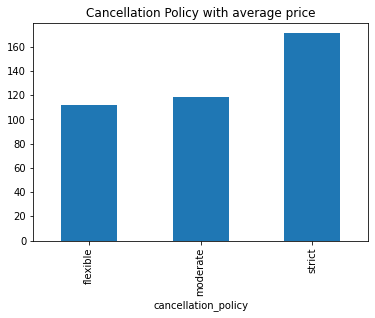

In [13]:
#Answer for question 1
count_vals = df_listings_withprice.groupby('cancellation_policy').mean('price_y')['price_y']

(count_vals[:10]).plot(kind="bar");
plt.title("Cancellation Policy with average price");

# Question 2 - Top 10 listings with most reviews, atleast a 9.0 review score

In [14]:
df_listings_with_reviewer = pd.merge(df_listings[df_listings['review_scores_value'] > 9], 
                                     df_reviews.groupby('listing_id').size().to_frame('size') , 
                                     on='listing_id', how='left')

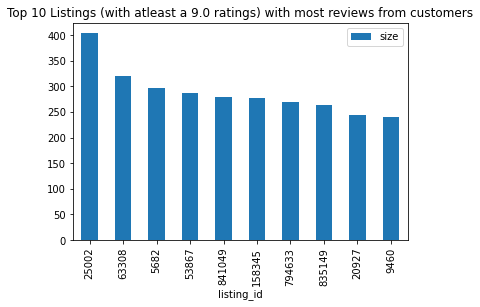

In [15]:
count_vals = df_listings_with_reviewer[["listing_id", "size"]].sort_values('size', ascending=False).head(10).groupby('listing_id').sum('size').sort_values('size', ascending=False)

(count_vals[:10]).plot(kind="bar");
plt.title("Top 10 Listings (with atleast a 9.0 ratings) with most reviews from customers");

# Question 3 - Top 10 reviewers

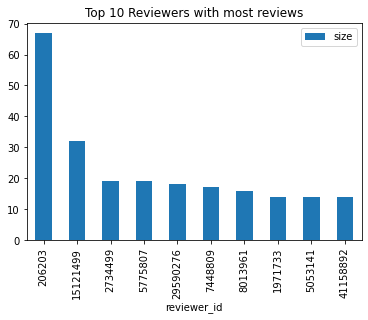

In [16]:
count_vals = df_reviews.groupby('reviewer_id').size().to_frame('size').sort_values('size', ascending=False).head(10)

(count_vals[:10]).plot(kind="bar");
plt.title("Top 10 Reviewers with most reviews");